## Naive Bayes

**Naive Bayes** classifier assumes that the effect of a particular feature in a class is independent of other features. This assumption simplifies computation, and that's why it is considered as naive.

## Example 1

: classifying text messages as either "spam" or "ham"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

1. 가상 데이터 생성

In [ ]:
messages = [
    "Congratulations! You've won a $1,000 gift card!",
    "Call us now for a special offer.",
    "Can we meet tomorrow for the project?",
    "Don't forget our appointment next week.",
    "You are selected! Claim your prize NOW.",
    "Get rich now! Ask me how.",
    "Congratulations! Click the link to claim your holiday trip.",
    "You've been pre-selected for a credit card with a $5,000 limit.",
    "Mom called. She said she'll visit next weekend.",
    "Could you help me with the homework for tomorrow?",
    "The meeting is rescheduled to 3 PM. Please update your calendar.",
    "Earn $500 a day from home. No experience needed!",
    "Do you have the notes from yesterday's class?",
    "How's your pet doing after the vet visit?",
    "Exclusive access: Watch this video to change your life forever!",
    "You won't believe what celebrities do to lose weight! Click now.",
    "Hey, are we still on for dinner tonight?"
]

labels = ["spam", "spam", "ham", "ham", "spam", "spam", "spam", "spam", "ham", "ham", "ham",
          "spam", "ham", "ham", "spam", "spam", "ham"]

In [ ]:
# convert text messages into feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages)

In [ ]:
X.shape   # 97개의 feature를 가진 17개의 sample

(17, 97)

2. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.3, random_state = 10)

3. Training

MultinomialNB 사용

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

4. Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.33%


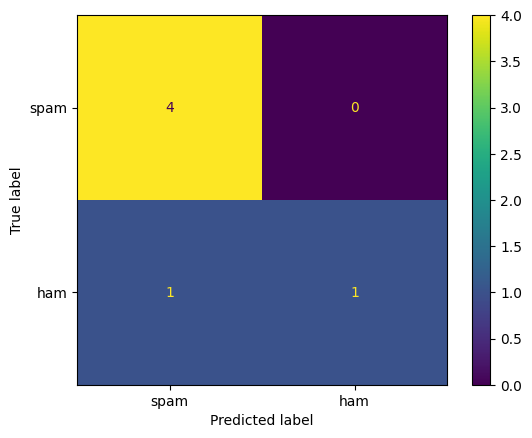

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay
)

labels = ["spam", "ham"]
cm = confusion_matrix(y_test, predicted, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()

## Example 2

: label이 3개일 때

1. 가상 데이터 생성

In [ ]:
from sklearn.datasets import make_classification

# 분류용 가상 데이터 생성
X, y = make_classification(
    n_features = 6,   # 독립 변수 개수
    n_classes = 3,   # 종속 변수의 class 개수
    n_samples = 800,
    n_informative = 2,   # 종속 변수와 상관관계가 있는 독립 변수의 개수
    random_state = 1,
    n_clusters_per_class = 1,   # class당 cluster 개수
)

In [ ]:
X.shape   # 6개의 feature 가진 sample 800개

(800, 6)

In [ ]:
y.shape

(800,)

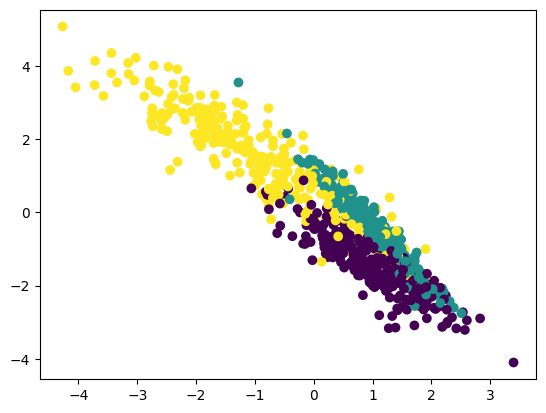

In [ ]:
# 첫 번째 feature와 두 번째 feature를 class에 따라 나타냄
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

2. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 10
)

3. Training

GaussianNB 사용

In [ ]:
from sklearn.naive_bayes import GaussianNB

# build a Gaussian Classifier
model = GaussianNB()

# training
model.fit(X_train, y_train)

# prediction
predicted = model.predict([X_test[6]])   # 여섯 번째 test data에 대한 prediction

# actual and predicted values are the same
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 2
Predicted Value: 2


4. Model Evaluation

In [ ]:
from sklearn.metrics import f1_score

# evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average = "weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.875
F1 Score: 0.8748850927313181


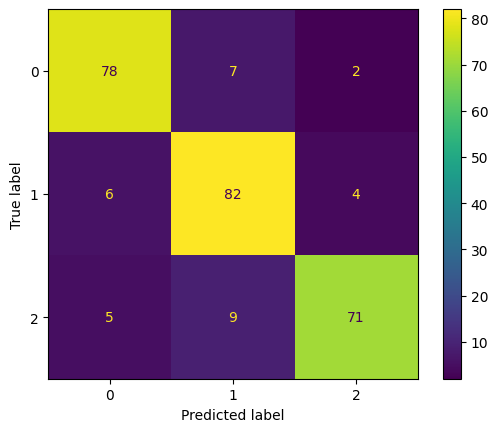

In [ ]:
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()

참고한 페이지

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
